In [7]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

Collecting and Analysising the data 

Heart Disease Dataset

In [8]:
# Load the data 
heart_dataset = pd.read_csv('/content/heart.csv')

In [9]:
# printing the first 5 rows of the dataset to get a visual 
heart_dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# Number of rows and columns 
heart_dataset.shape

(303, 14)

In [11]:
# Finding the missing values in each column 
heart_dataset.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# Count of all missing values 
heart_dataset = heart_dataset.dropna(axis=1)

In [13]:
# Statistical Measures 
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
# Number of patients with a heart disease and without
heart_dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


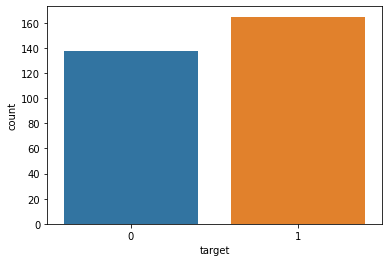

In [15]:
# visualization of the count 
sns.countplot(heart_dataset['target'])

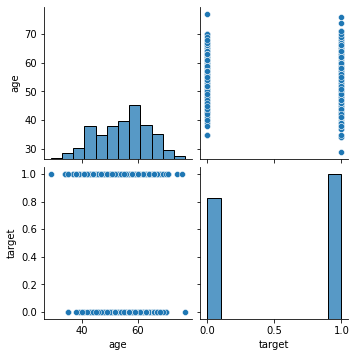

In [16]:
# creating a pairplot
sns.pairplot(heart_dataset[['age', 'target']])

In [17]:
# Data Types
heart_dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

0 represents a healthy heart

1 represents an unhealthy heart 

Seperating the Features and Target 

In [18]:
# Seperating the features 
X = heart_dataset.drop('target', axis=1)

In [19]:
# Seperating the target
Y = heart_dataset['target']

In [20]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [21]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Training and Testing our data

In [22]:
# We have to split our data into training and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 0)

In [23]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [24]:
# Normalizing our data to have values between 0 and 1 
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

Training our Model using Machine Learning Algorithms 

In [25]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state= 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [26]:
# Testing the models Accuracy using the training dataset 
model = forest
model.score(X_train, Y_train)

0.987603305785124

In [27]:
# Testing the models Accuracy using the test dataset
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test, model.predict(X_test))

TN = matrix[0][0]
TP = matrix[1][1]
FN = matrix[1][0]
FP = matrix[0][1]

print(matrix) 

print('Test Accuracy = ', ( (TP + TN)/(TP + TN + FN + FP) ) )

[[23  4]
 [ 6 28]]
Test Accuracy =  0.8360655737704918


In [28]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression(random_state=0)
lr.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [29]:
model = lr
model.score(X_train, Y_train)

0.8429752066115702

In [30]:
matrix = confusion_matrix(Y_test, model.predict(X_test))

TN = matrix[0][0]
TP = matrix[1][1]
FN = matrix[1][0]
FP = matrix[0][1]

print(matrix) 

print('Test Accuracy = ', ( (TP + TN)/(TP + TN + FN + FP) ) )

[[21  6]
 [ 3 31]]
Test Accuracy =  0.8524590163934426


In [31]:
# Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier 
tree= DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [32]:
model = tree
model.score(X_train, Y_train) 

1.0

In [33]:
matrix = confusion_matrix(Y_test, model.predict(X_test))

TN = matrix[0][0]
TP = matrix[1][1]
FN = matrix[1][0]
FP = matrix[0][1]

print(matrix) 

print('Test Accuracy = ', ( (TP + TN)/(TP + TN + FN + FP) ) )

[[22  5]
 [ 8 26]]
Test Accuracy =  0.7868852459016393


In [34]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [35]:
model = svc
model.score(X_train, Y_train) 

0.8925619834710744

In [36]:
matrix = confusion_matrix(Y_test, model.predict(X_test))

TN = matrix[0][0]
TP = matrix[1][1]
FN = matrix[1][0]
FP = matrix[0][1]

print(matrix) 

print('Test Accuracy = ', ( (TP + TN)/(TP + TN + FN + FP) ) )

[[21  6]
 [ 2 32]]
Test Accuracy =  0.8688524590163934


In [37]:
# XGBClassifier
from xgboost import XGBClassifier

boost = XGBClassifier(random_state=1)

boost.fit(X_train, Y_train)

XGBClassifier(random_state=1)

In [38]:
model = boost
model.score(X_train, Y_train) 

0.9917355371900827

In [39]:
matrix = confusion_matrix(Y_test, model.predict(X_test))

TN = matrix[0][0]
TP = matrix[1][1]
FN = matrix[1][0]
FP = matrix[0][1]

print(matrix) 

print('Test Accuracy = ', ( (TP + TN)/(TP + TN + FN + FP) ) )

[[22  5]
 [ 4 30]]
Test Accuracy =  0.8524590163934426
